In [37]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [39]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [40]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [41]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Convert the scaled data back to a DataFrame
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Display the normalized data
df_market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [42]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [43]:

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)


# Extract the crypto names from the 'coin_id' index
crypto_names = df_market_data.index.tolist()

# Add a 'crypto_names' column to the DataFrame
df_market_data['crypto_names'] = crypto_names

# Copy the crypto names from the original data
df_scaled['crypto_names'] = df_market_data['crypto_names']

# Set the 'coinid' column as the index
#df_scaled.set_index('coinid', inplace=True)

# Display sample data
df_scaled.index #head(10)
#df_market_data.head(10)




Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')

---

### Find the Best Value for k Using the Original Data.

In [44]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 12))


In [45]:

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Remove non-numeric columns
df_market_data_numeric = df_market_data.select_dtypes(include=['float64', 'int64'])

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters, and set n_init explicitly
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=0)
    
    # Fit the model to the data using df_market_data_numeric
    kmeans_model.fit(df_market_data_numeric)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)





In [46]:
# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k_values": k_values,
    "inertia_values": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
import pandas as pd
df_elbow = pd.DataFrame(elbow_data)



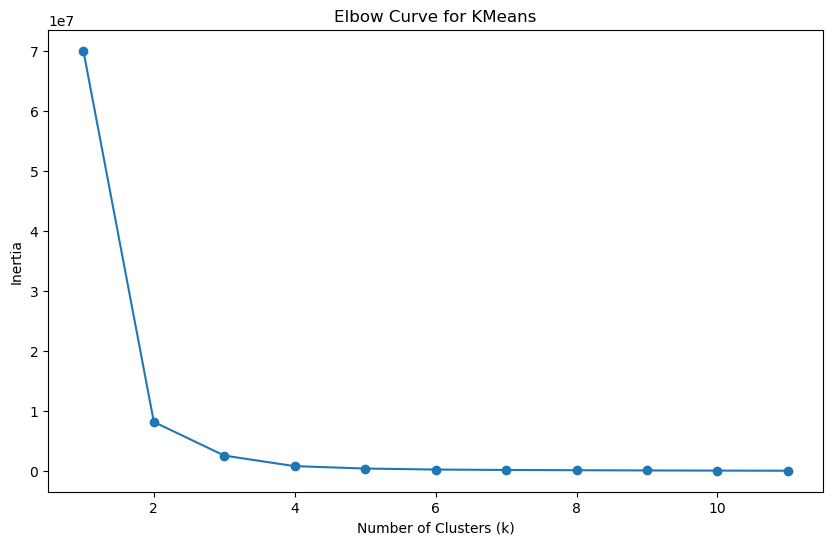

In [47]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10,6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o')
plt.title('Elbow Curve for KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 2

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [51]:


# Initialize the K-Means model using the best value for k

# Remove non-numeric columns
df_market_data_numeric = df_market_data.select_dtypes(include=['float64', 'int64'])

# Set the identified best value for k
best_k = 3  # Replace 3 with the identified best value for k

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

# Fit the K-Means model to the original data
kmeans_model.fit(df_market_data_numeric)





KMeans(n_clusters=3, random_state=0)

In [53]:
# Fit the K-Means model using the scaled data


# Remove non-numeric columns
df_market_data_scaled_numeric = df_market_data_scaled.select_dtypes(include=['float64', 'int64'])



# Set the identified best value for k
best_k = 3  # Replace 3 with the identified best value for k

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

# Fit the K-Means model to the scaled data
kmeans_model.fit(df_market_data_scaled_numeric)



KMeans(n_clusters=3, random_state=0)

In [54]:

# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_values = kmeans_model.predict(df_market_data_scaled_numeric)

# Print the resulting array of cluster values
print(cluster_values)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0
 1 1 1 1]


In [55]:
# Create a copy of the DataFrame

df_market_data_copy = df_market_data.copy()


In [57]:

# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['predicted_cluster'] = cluster_values

# Display sample data
df_market_data_copy.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_names,predicted_cluster
coin_id,,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,bitcoin,1
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,ethereum,1
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,tether,1
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,ripple,1
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,bitcoin-cash,1


In [63]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.



import hvplot.pandas

# Create a scatter plot with hvplot
scatter_plot = df_market_data_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",
    colormap="viridis",
    hover_cols=["crypto_names"],
    title="Cryptocurrency Clusters based on Price Changes",
    xlabel="24h Price Change Percentage",
    ylabel="7d Price Change Percentage",
    height=500,
    width=800
)

# Show the scatter plot
scatter_plot



:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster,crypto_names)

---

### Optimize Clusters with Principal Component Analysis.

In [64]:
# Create a PCA model instance and set `n_components=3`.
# Import the PCA module from scikit-learn


# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)


In [65]:

# Use the PCA model with fit_transform to reduce to three principal components
pca_features = pca.fit_transform(df_market_data_scaled_numeric)

# Convert the PCA features to a DataFrame
df_pca_components = pd.DataFrame(
    data=pca_features, 
    columns=['PCA1', 'PCA2', 'PCA3'], 
    index=df_market_data_scaled_numeric.index
)

# View the first five rows of the DataFrame
df_pca_components.head()


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [66]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
# Retrieve the explained variance from the PCA model
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
for i, ratio in enumerate(explained_variance, 1):
    print(f"Explained Variance for PCA{i}: {ratio:.4f}")


Explained Variance for PCA1: 0.3720
Explained Variance for PCA2: 0.3470
Explained Variance for PCA3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3720 0.3470 0.1760

In [73]:
# Create a DataFrame with the PCA data
df_pca_data = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
df_pca_data['crypto_names'] = df_market_data_copy['crypto_names']

# Set the coinid column as the index
# df_pca_data.set_index('coin_id', inplace=True)

# Display sample data
df_pca_data.head()




,PCA1,PCA2,PCA3,crypto_names
0,-0.600667,0.842760,0.461595,NaN
1,-0.458261,0.458466,0.952877,NaN
2,-0.433070,-0.168126,-0.641752,NaN
3,-0.471835,-0.222660,-0.479053,NaN
4,-1.157800,2.041209,1.859715,NaN


---

### Find the Best Value for k Using the PCA Data

In [74]:
# Create a list with the number of k-values from 1 to 11
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [76]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_pca_data` after handling missing values
# 3. Append the model.inertia_ to the inertia list

# Check for missing values
print(df_pca_data.isnull().sum())

# Replace missing values with 0
df_pca_data.fillna(0, inplace=True)

# Iterate over different values of k
for k in range(1, 12):
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    # Fit the model to the data using df_pca_data
    kmeans_model.fit(df_pca_data)
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

    




PCA1             0
PCA2             0
PCA3             0
crypto_names    41
dtype: int64


In [77]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": list(range(1, 12)), "inertia_values": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.set_index('k_values', inplace=True)
df_elbow.head()



,inertia_values
k_values,
1,256.874086
2,168.811896
3,93.774626
4,49.665497
5,37.839466


In [78]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import hvplot.pandas

# Plot a line chart for the inertia values
elbow_plot = df_elbow.hvplot.line(
    x="k_values",
    y="inertia_values",
    title="Elbow Curve",
    xlabel="Number of Clusters (k)",
    ylabel="Inertia",
    width=600,
    height=400
)

elbow_plot


:Curve   [k_values]   (inertia_values)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes. PCA reduces the dimensionality of the data, and the resulting components might provide a different perspective on the optimal number of clusters. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [79]:
# Initialize the K-Means model using the best value for k
best_k_pca = 3
kmeans_model_pca = KMeans(n_clusters=best_k_pca, random_state=0)


In [80]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(df_pca_data)


KMeans(n_clusters=3, random_state=0)

In [81]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.
clusters_pca = kmeans_model_pca.predict(df_pca_data)
print(clusters_pca)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0
 1 1 1 1]


In [84]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data
df_pca_data_copy = df_pca_data.copy()
df_pca_data_copy['predicted_clusters'] = clusters_pca
df_pca_data_copy.head()



,PCA1,PCA2,PCA3,crypto_names,predicted_clusters
0,-0.600667,0.842760,0.461595,0,1
1,-0.458261,0.458466,0.952877,0,1
2,-0.433070,-0.168126,-0.641752,0,1
3,-0.471835,-0.222660,-0.479053,0,1
4,-1.157800,2.041209,1.859715,0,1


In [85]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas

df_pca_data_copy.hvplot.scatter(x="PCA1", y="PCA2", by="predicted_clusters", hover_cols=["crypto_names"])


:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,crypto_names)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

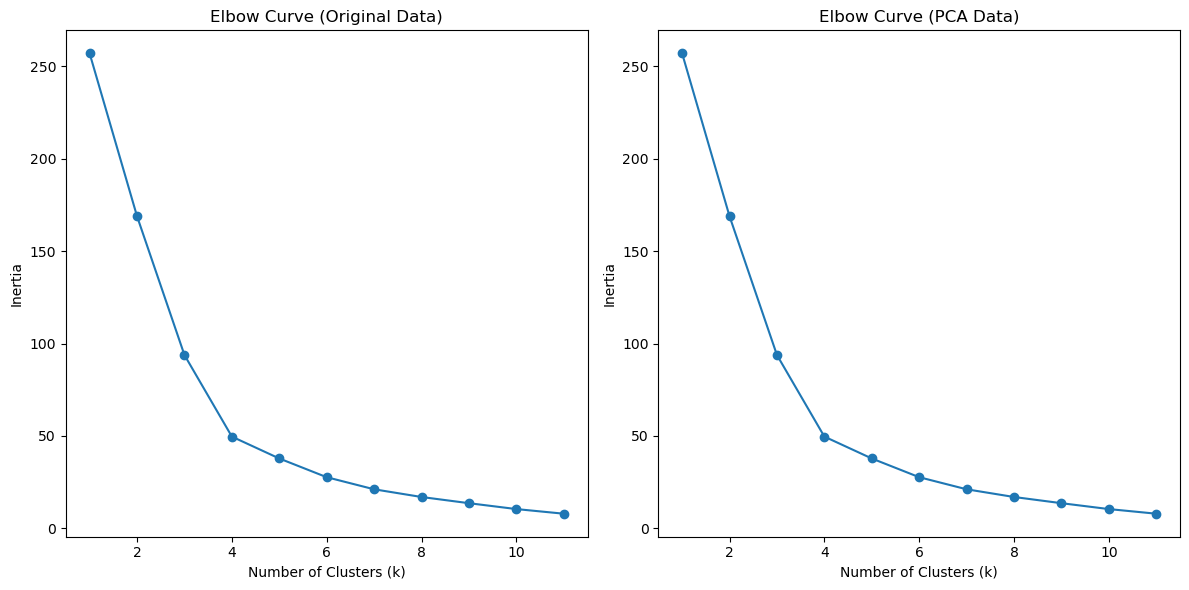

In [88]:
# Composite plot to contrast the Elbow curves


# Create a composite plot for Elbow curves
plt.figure(figsize=(12, 6))

# Plot the Elbow curve for the original data
plt.subplot(1, 2, 1)
plt.plot(range(1, 12), inertia_values, marker='o')
plt.title('Elbow Curve (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot the Elbow curve for the PCA data
plt.subplot(1, 2, 2)
plt.plot(range(1, 12), inertia_values, marker='o')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()


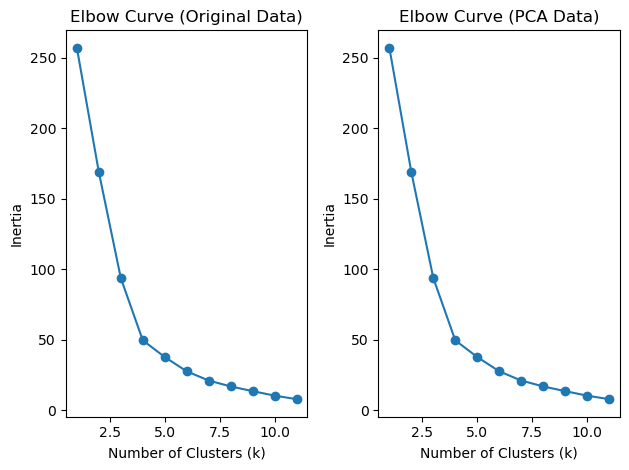

In [91]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!


# Plot the Elbow curve for the original data
plt.subplot(1, 2, 1)
plt.plot(range(1, 12), inertia_values, marker='o')
plt.title('Elbow Curve (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot the Elbow curve for the PCA data
plt.subplot(1, 2, 2)
plt.plot(range(1, 12), inertia_values, marker='o')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The impact is typically a reduction in the dimensionality of the data which can can lead to simpler and more efficient models, particularly when dealing with high-dimensional datasets. However, reducing the number of features may result in some loss of information, which can potentially affect the accuracy of the clustering results. 